In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, peak_signal_noise_ratio

In [1]:
!ls ../../data/Fivek_dataset

Fivek_test_set.mat
Fivek_train_set.hdf5
test_fivek_rawRGB_alpha_0.01_beta_0.0002.hdf5
test_fivek_rawRGB_alpha_0.01_beta_0.02.hdf5
test_fivek_rawRGB_alpha_0.05_beta_0.02.hdf5
train_fivek_rawRGB_25000x256x256_cropped_alpha_0.01_beta_0.0002.hdf5
train_fivek_rawRGB_25000x256x256_cropped_alpha_0.01_beta_0.02.hdf5
train_fivek_rawRGB_25000x256x256_cropped_alpha_0.05_beta_0.02.hdf5
Untitled.ipynb


In [2]:
import scipy.io as sio
data = sio.loadmat("../../data/Fivek_dataset/Fivek_test_set.mat")
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Nov  8 22:24:18 2020',
 '__version__': '1.0',
 '__globals__': [],
 'noisy_images': array([[[6.70228973e-02, 1.08291082e-01, 8.29396471e-02, ...,
          4.51539457e-02, 5.09063937e-02, 5.26061058e-02],
         [4.62930650e-02, 2.64299307e-02, 4.36224118e-02, ...,
          1.80791281e-02, 5.04325740e-02, 1.95481107e-02],
         [3.80798019e-02, 7.13953450e-02, 4.36169021e-02, ...,
          4.77324091e-02, 5.94714433e-02, 4.96796519e-02],
         ...,
         [2.17971891e-01, 1.88804984e-01, 2.25137010e-01, ...,
          1.74154285e-02, 3.32486480e-02, 1.67071950e-02],
         [1.91837832e-01, 2.07275018e-01, 1.99612767e-01, ...,
          3.00686285e-02, 3.04421447e-02, 3.21619138e-02],
         [2.10464537e-01, 1.74744904e-01, 2.23726347e-01, ...,
          1.85351633e-02, 3.03247757e-02, 1.55307595e-02]],
 
        [[9.11015719e-02, 1.64362013e-01, 8.94079879e-02, ...,
          1.86644346e-01, 1.00806460

In [3]:
plt.subplot(121)
plt.imshow(data['noisy_images'][0])
plt.subplot(122)
plt.imshow(data['clean_images'][0])

NameError: name 'plt' is not defined

In [4]:
structural_similarity(data['noisy_images'][0],data['clean_images'][0])

NameError: name 'structural_similarity' is not defined

In [21]:
data["noisy_info"][0]

array([0., 0.])

In [6]:
index = 0
target_clean_img = data['clean_images'][index].astype('float64')*256
del data

In [7]:
target_clean_img.shape

(512, 512)

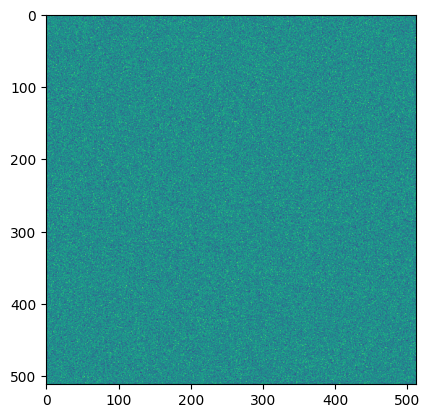

In [8]:
noise = np.random.normal(0,41,target_clean_img.shape)
plt.imshow(noise)

In [9]:
target_clean_img.min(), target_clean_img.max(), noise.min(), noise.max()

(0.0, 255.984375, -190.122247107439, 196.34764011825578)

ssim : 0.08546, psnr : 15.91457


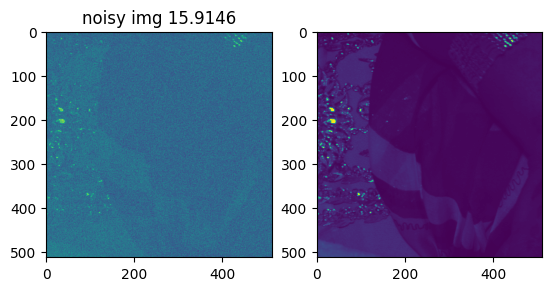

In [11]:
target_noisy_img = target_clean_img + noise
psnr = peak_signal_noise_ratio(target_clean_img,target_noisy_img,data_range=256)
ssim = structural_similarity(target_clean_img,target_noisy_img,data_range=256)
plt.subplot(121)
plt.title(f"noisy img {psnr:.4f}")
plt.imshow(target_noisy_img)
plt.subplot(122)
plt.imshow(target_clean_img)

print(f"ssim : {ssim:.5f}, psnr : {psnr:.5f}")

In [13]:
y_len, x_len = target_noisy_img.shape
d = 8
img_patches = []
for x in range(x_len-d+1):
    for y in range(y_len-d+1):
        patch = target_noisy_img[y:y+d,x:x+d]
        img_patches.append(patch)
assert(len(img_patches) == (y_len-d+1)*(x_len-d+1))
img_patches = np.array(img_patches)

In [14]:
len_patches = (y_len-d+1)*(x_len-d+1)
print(len_patches)

255025


In [15]:
img_patches = img_patches.reshape(-1,d*d)
img_patches.shape

(255025, 64)

In [16]:
mu = np.mean(img_patches,axis=0,keepdims=True)
print("mu shape : ",mu.shape)

mu shape :  (1, 64)


In [88]:
mu.reshape(-1).sort()
mu

array([[13.4347819 , 13.45176655, 13.46631139, 13.46750198, 13.47944956,
        13.48921033, 13.49663295, 13.49865702, 13.50348805, 13.51136547,
        13.5127319 , 13.51586288, 13.5232896 , 13.53104581, 13.53125897,
        13.5330981 , 13.53415202, 13.53939079, 13.5484288 , 13.55477567,
        13.55685943, 13.56828878, 13.56893491, 13.57268309, 13.57433518,
        13.57492255, 13.57643468, 13.58916185, 13.59174222, 13.59656549,
        13.5974242 , 13.60870206, 13.61080269, 13.61093177, 13.63084222,
        13.63262463, 13.63510542, 13.63932609, 13.64715476, 13.65286989,
        13.6631449 , 13.66762961, 13.66984693, 13.67242491, 13.6759937 ,
        13.68122163, 13.69429736, 13.69895307, 13.70138269, 13.70913225,
        13.71689847, 13.72344108, 13.73036511, 13.73530612, 13.73840557,
        13.7388396 , 13.7536348 , 13.75645173, 13.76027807, 13.76891473,
        13.77802187, 13.79314385, 13.81487171, 13.82407052]])

In [91]:
val['mu'] = sorted(val['mu'])
val['mu']

[tensor([13.1668], device='cuda:0'),
 tensor([13.2524], device='cuda:0'),
 tensor([13.2746], device='cuda:0'),
 tensor([13.3030], device='cuda:0'),
 tensor([13.3148], device='cuda:0'),
 tensor([13.3250], device='cuda:0'),
 tensor([13.3289], device='cuda:0'),
 tensor([13.3504], device='cuda:0'),
 tensor([13.3536], device='cuda:0'),
 tensor([13.3729], device='cuda:0'),
 tensor([13.4010], device='cuda:0'),
 tensor([13.4362], device='cuda:0'),
 tensor([13.4453], device='cuda:0'),
 tensor([13.4644], device='cuda:0'),
 tensor([13.4661], device='cuda:0'),
 tensor([13.4713], device='cuda:0'),
 tensor([13.4763], device='cuda:0'),
 tensor([13.5143], device='cuda:0'),
 tensor([13.5455], device='cuda:0'),
 tensor([13.5457], device='cuda:0'),
 tensor([13.5614], device='cuda:0'),
 tensor([13.5663], device='cuda:0'),
 tensor([13.5752], device='cuda:0'),
 tensor([13.5781], device='cuda:0'),
 tensor([13.6266], device='cuda:0'),
 tensor([13.6434], device='cuda:0'),
 tensor([13.6467], device='cuda:0'),
 

In [19]:
X = (img_patches-mu).T
X.shape

(64, 255025)

In [51]:

Sigma = X@X.T
Sigma.shape

(64, 64)

In [84]:
val['sigma_X'][0]

tensor([2001.9712,  239.8224,  226.0598,  162.6631,  172.1112,   89.5622,
         137.0241,  104.1990,  240.9841,  237.2786,  198.1264,  197.1539,
         143.8652,  155.8773,  116.0096,  123.8855,  200.1022,  162.4881,
         193.7799,  152.4810,  159.2836,  111.2536,  156.0753,  117.6307,
         124.4589,  171.8602,  108.4049,  162.1056,  114.3695,  128.6217,
         119.5578,  144.7988,  156.5182,  121.7122,  160.0059,  113.9491,
         146.3787,  100.1874,  153.6449,   94.7285,  116.0933,  130.1749,
         116.5907,  127.3432,  103.8921,  138.0155,   91.4061,  114.7467,
         140.7137,  111.8420,  133.3728,  113.0194,  171.2250,   96.0302,
         151.3596,  111.0282,  108.9458,  126.7803,  104.1848,  124.5012,
         108.5246,  143.2592,   99.5850,  126.8061], device='cuda:0')

In [79]:
Sigma[0]

array([5.09198420e+08, 5.94728501e+07, 5.89465680e+07, 3.98498685e+07,
       4.44218211e+07, 2.99077178e+07, 3.53836040e+07, 2.56177732e+07,
       5.55913394e+07, 6.05920430e+07, 4.59590901e+07, 4.68759605e+07,
       3.33265341e+07, 3.81753840e+07, 2.79297035e+07, 3.16642862e+07,
       5.36003464e+07, 4.09582389e+07, 5.05759547e+07, 3.69640125e+07,
       4.37073403e+07, 3.05479084e+07, 3.74587833e+07, 2.66081589e+07,
       3.45543434e+07, 4.15212791e+07, 3.27571007e+07, 3.95078880e+07,
       3.23210060e+07, 3.70895932e+07, 2.80834533e+07, 3.13107990e+07,
       4.18119463e+07, 3.14377024e+07, 4.19946260e+07, 3.02862925e+07,
       4.05908309e+07, 2.97088788e+07, 3.93431600e+07, 2.71685764e+07,
       2.84822844e+07, 3.30057224e+07, 2.78883394e+07, 3.56006871e+07,
       2.91733651e+07, 3.41067819e+07, 2.76516861e+07, 3.32119558e+07,
       3.57576054e+07, 2.71709116e+07, 3.49134606e+07, 2.68774314e+07,
       3.68760663e+07, 2.72351110e+07, 3.72621536e+07, 2.66498727e+07,
      

In [72]:
sig_value,_=torch.symeig(torch.Tensor(Sigma),eigenvectors=True)
sig_value.sort()
# sig_value = np.flip(np.array(sig_value))
sig_value.shape

torch.Size([64])

In [64]:
for ii in range(-1, -d-1, -1):
    tau = torch.mean(sig_value[:ii])
    print(torch.sqrt(tau))
    if torch.sum(sig_value[:ii]>tau) == torch.sum(sig_value[:ii] < tau):
        print(torch.sqrt(tau))
        

tensor(21640.0020)
tensor(21508.2188)
tensor(21412.4297)
tensor(21315.4941)
tensor(21241.7012)
tensor(21183.6641)
tensor(21147.7441)
tensor(21111.5273)


In [74]:
triangle=torch.ones((d,d))
triangle= torch.tril(triangle)
print(triangle.shape)
sig_matrix= torch.matmul( triangle, torch.diag(sig_value)) 

# calculate whole threshold value at a single time
num_vec= torch.arange(d)+1
num_vec=num_vec.to(dtype=torch.float32)
sum_arr= torch.sum(sig_matrix,dim=1)
tau_arr=sum_arr/num_vec

tau_mat= torch.matmul(torch.diag(tau_arr),triangle)

# find median value with masking scheme: 
big_bool= torch.sum(sig_matrix>tau_mat,axis=1)
small_bool= torch.sum(sig_matrix<tau_mat,axis=1)
mask=(big_bool==small_bool).to(dtype=torch.float32)
tau_chen=torch.max(mask*tau_arr)
tau_chen

torch.Size([8, 8])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (8x8 and 64x64)

In [59]:
sig_value

In [49]:
eigen_val = np.linalg.eigvals(Sigma).reshape(-1)
eigen_val.shape

(64,)

In [50]:
eigen_val.sort()
eigen_val = np.flip(eigen_val)
eigen_val

array([2.95734151e+09, 8.20831716e+08, 7.13393326e+08, 7.07007773e+08,
       6.39633624e+08, 5.94017082e+08, 5.35418649e+08, 5.32935390e+08,
       5.25689247e+08, 4.98819948e+08, 4.98050870e+08, 4.94063303e+08,
       4.90922040e+08, 4.77179643e+08, 4.73018303e+08, 4.67380936e+08,
       4.66664005e+08, 4.59378387e+08, 4.58985973e+08, 4.54850282e+08,
       4.53636399e+08, 4.51511234e+08, 4.47624087e+08, 4.47208495e+08,
       4.46530327e+08, 4.45087447e+08, 4.44749729e+08, 4.43722495e+08,
       4.43414248e+08, 4.42761492e+08, 4.41837193e+08, 4.41490477e+08,
       4.41365033e+08, 4.40853663e+08, 4.40395389e+08, 4.39880205e+08,
       4.39650635e+08, 4.37761886e+08, 4.37382261e+08, 4.36347784e+08,
       4.35390876e+08, 4.35133727e+08, 4.34866514e+08, 4.34771855e+08,
       4.34034477e+08, 4.33793206e+08, 4.33368514e+08, 4.33344137e+08,
       4.32455037e+08, 4.32163532e+08, 4.31586879e+08, 4.30881927e+08,
       4.30798770e+08, 4.29853336e+08, 4.29370806e+08, 4.29196922e+08,
      

In [48]:
for ii in range(-1, -d-1, -1):
    tau = np.mean(eigen_val[:ii])
    if np.sum(eigen_val[:ii]>tau) == np.sum(eigen_val[:ii] < tau):
        print( torch.sqrt(tau))
            

In [43]:
eigen_cumsum =np.cumsum(eigen_val)
if eigen_cumsum[-1]/len(eigen_cumsum) == np.median(eigen_val):
    print("use whole")
for i in range(len(eigen_val)):
    tau = (eigen_cumsum[-1] - eigen_cumsum[i]+eigen_val[i])/(len(eigen_cumsum)-i)
    print(tau)
    if tau == np.median(eigen_val):
        print(f"{i+1}th sigma : ",np.sqrt(tau))

507181093.76710796
468289658.6355698
462603496.4128508
458492187.733715
454350261.3141117
451209865.3328738
448747671.9472181
447227128.4877577
445696623.81499195
444242212.48738956
443231513.6867713
442197186.2065829
441199760.88232815
440224814.2234527
439485717.65778166
438801379.18585145
438205971.7572815
437600481.69571733
437127048.9654522
436641295.0999663
436227454.48355174
435822595.31978285
435449056.2937617
435152104.3213165
434850694.54218197
434551216.786627
434273947.56990415
433990818.35502386
433720494.004081
433443529.60846907
433169471.88515764
432906813.65501744
432638574.1605027
432357075.4968886
432073855.9103343
431786906.50798213
431497860.13044125
431195905.5203953
430943367.8087203
430685812.08139426
430449896.5981341
430235071.3926746
430012405.2119989
429781257.16801435
429531727.2867009
429294740.44820386
429044825.6695573
428790491.0795785
428505888.2367984
428242611.6785317
427962545.9647918
427683751.1169871
427417236.47202355
427109824.3378904
426835473.

In [81]:
estimated_sigma, val = chen_estimate(torch.Tensor(target_noisy_img))

pch :  torch.Size([1, 8, 8, 28561])
mu : torch.Size([64, 1])
X : torch.Size([64, 28561])
sigma_X : torch.Size([64, 64])
sig value :  torch.Size([64])


In [77]:
import torch
import time

def im2patch(im,pch_size,stride=1):
    if isinstance(pch_size, tuple):
        pch_H, pch_W = pch_size
    elif isinstance(pch_size, int):
        pch_H = pch_W = pch_size
    else:
        sys.exit('The input of pch_size must be a integer or a int tuple!')
    if isinstance(stride, tuple):
        stride_H, stride_W = stride
    elif isinstance(stride, int):
        stride_H = stride_W = stride
    else:
        sys.exit('The input of stride must be a integer or a int tuple!')

    C, H, W = im.size()
    num_H = len(range(0, H-pch_H+1, stride_H))
    num_W = len(range(0, W-pch_W+1, stride_W))
    num_pch = num_H * num_W
    pch = torch.zeros((C, pch_H*pch_W, num_pch)).cuda()
    kk = 0
    for ii in range(pch_H):
        for jj in range(pch_W):
            temp = im[:, ii:H-pch_H+ii+1:stride_H, jj:W-pch_W+jj+1:stride_W]
            pch[:, kk, :] = temp.reshape((C, num_pch))
            kk += 1

    return pch.view((C, pch_H, pch_W, num_pch))
def chen_estimate(im,pch_size=8):
    """
    Estimated GAT transformed noise to gaussian noise (supposed to be variance 1)
    """
    im=torch.squeeze(im)
    
    #grayscale
    im=im.unsqueeze(0)
    pch=im2patch(im,pch_size,3)
    print("pch : ",pch.shape)
    num_pch=pch.size()[3]
    pch=pch.view((-1,num_pch))
    d=pch.size()[0]
    mu=torch.mean(pch,dim=1,keepdim=True)
    print("mu :",mu.shape)
    X=pch-mu
    print("X :",X.shape)
    sigma_X=torch.matmul(X,torch.t(X))/num_pch
    print("sigma_X :",sigma_X.shape)
    sig_value,_=torch.symeig(sigma_X,eigenvectors=True)
    sig_value=sig_value.sort().values
    print("sig value : ",sig_value.shape)
    
    start=time.time()
    # tensor operation for substituting iterative step.
    # These operation make  parallel computing possiblie which is more efficient

    triangle=torch.ones((d,d))
    triangle= torch.tril(triangle).cuda()
    sig_matrix= torch.matmul( triangle, torch.diag(sig_value)) 
    
    # calculate whole threshold value at a single time
    num_vec= torch.arange(d)+1
    num_vec=num_vec.to(dtype=torch.float32).cuda()
    sum_arr= torch.sum(sig_matrix,dim=1)
    tau_arr=sum_arr/num_vec
    
    tau_mat= torch.matmul(torch.diag(tau_arr),triangle)
    
    # find median value with masking scheme: 
    big_bool= torch.sum(sig_matrix>tau_mat,axis=1)
    small_bool= torch.sum(sig_matrix<tau_mat,axis=1)
    mask=(big_bool==small_bool).to(dtype=torch.float32).cuda()
    tau_chen=torch.max(mask*tau_arr)
      
# Previous implementation       
#    for ii in range(-1, -d-1, -1):
#        tau = torch.mean(sig_value[:ii])
#        if torch.sum(sig_value[:ii]>tau) == torch.sum(sig_value[:ii] < tau):
             #  return torch.sqrt(tau)
#    print('old: ', torch.sqrt(tau))

    return torch.sqrt(tau_chen), {"mu":mu,"sigma_X" : sigma_X,"sig_value" : sig_value}